# Classificador de intenção usando SVM 

Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
import json

data = []

with open('data23.json','rb') as file:
    data = json.load(file)
    
for d in data:
    print(d['text'],end=', ')
    for l in d['labels']:
        print("#",l[2],end='#')
    print('\n')


Olá, # cumprimento#

Oi, # cumprimento#

tenho saias para vender. Alguma preferência de tecido?, # disponibilidade## saia## tecido## pergunta_preferencia#

Olá. Tudo bem?, # cumprimento## cumprimento#

Tudo bem? Posso te ajudar a melhorar seu estilo! O que você quer comprar hoje? Calça, camisa?, # cumprimento## pergunta_preferencia## calça## camisa#

Só tem saias?, # saia#

Oi, Bruna, # cumprimento#

Tenho moletons também! não gosta de saias?, # pergunta_preferencia## saia## moletom## disponibilidade#

Sim! tem calça jeans?, # confirmação## pergunta_produto## calça## tecido#

Tudo sim. Eu estou procurando uma saia pra minha irmã, # confirmação## disponibilidade## saia#

Temos! Qual é o seu tamanho?, # confirmação## tamanho#

Não tenho interesse em saias, que marcas de moletom vc tem?, # saia## marca## moletom## disponibilidade## negação#

O que lhe trás em nossa maravilhosa loja?, # elogio## pergunta_preferencia#

Qual o tecido da saia que ela gosta?, # tecido## saia## pergunta_prefere

Obtendo *features*

In [ ]:
cols = 'cumprimento,pergunta_preferencia,pergunta_produto,confirmação,interesse_cliente,negação,pergunta_entrega,elogio,forma_entrega,pergunta_pagamento,recomendação,promoção,pergunta_forma_pagamento,preço,agradecimento,saia,calça,camisa,moletom,blusa,vestido,tecido,marca,tamanho,cor,estampa,modelagem,cintura,disponibilidade,forma_pagamento'
cols = cols.split(',')
cols.sort()
cols

['agradecimento',
 'blusa',
 'calça',
 'camisa',
 'cintura',
 'confirmação',
 'cor',
 'cumprimento',
 'disponibilidade',
 'elogio',
 'estampa',
 'forma_entrega',
 'forma_pagamento',
 'interesse_cliente',
 'marca',
 'modelagem',
 'moletom',
 'negação',
 'pergunta_entrega',
 'pergunta_forma_pagamento',
 'pergunta_pagamento',
 'pergunta_preferencia',
 'pergunta_produto',
 'preço',
 'promoção',
 'recomendação',
 'saia',
 'tamanho',
 'tecido',
 'vestido']

In [ ]:
cols = ['sentence'] + cols
cols

['sentence',
 'agradecimento',
 'blusa',
 'calça',
 'camisa',
 'cintura',
 'confirmação',
 'cor',
 'cumprimento',
 'disponibilidade',
 'elogio',
 'estampa',
 'forma_entrega',
 'forma_pagamento',
 'interesse_cliente',
 'marca',
 'modelagem',
 'moletom',
 'negação',
 'pergunta_entrega',
 'pergunta_forma_pagamento',
 'pergunta_pagamento',
 'pergunta_preferencia',
 'pergunta_produto',
 'preço',
 'promoção',
 'recomendação',
 'saia',
 'tamanho',
 'tecido',
 'vestido']

In [ ]:
df = pd.DataFrame(columns=cols)
df

,sentence,agradecimento,blusa,calça,camisa,cintura,confirmação,cor,cumprimento,disponibilidade,elogio,estampa,forma_entrega,forma_pagamento,interesse_cliente,marca,modelagem,moletom,negação,pergunta_entrega,pergunta_forma_pagamento,pergunta_pagamento,pergunta_preferencia,pergunta_produto,preço,promoção,recomendação,saia,tamanho,tecido,vestido


*Dataframe* propriamente dito

In [ ]:
texts = [t['text'] for t in data]
df['sentence'] = texts
df

,sentence,agradecimento,blusa,calça,camisa,cintura,confirmação,cor,cumprimento,disponibilidade,elogio,estampa,forma_entrega,forma_pagamento,interesse_cliente,marca,modelagem,moletom,negação,pergunta_entrega,pergunta_forma_pagamento,pergunta_pagamento,pergunta_preferencia,pergunta_produto,preço,promoção,recomendação,saia,tamanho,tecido,vestido
0,Olá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tenho saias para vender. Alguma preferência de...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Olá. Tudo bem?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tudo bem? Posso te ajudar a melhorar seu estil...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tem certeza? veja esse moletom.. neste tempo f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,"É lindo mesmo, mas vai ficar pra próxima",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,"Tá bom, ó aqui o seu pedido pode passar no cai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,"Ok, obrigado e boa tarde",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.fillna(0)
df

,sentence,agradecimento,blusa,calça,camisa,cintura,confirmação,cor,cumprimento,disponibilidade,elogio,estampa,forma_entrega,forma_pagamento,interesse_cliente,marca,modelagem,moletom,negação,pergunta_entrega,pergunta_forma_pagamento,pergunta_pagamento,pergunta_preferencia,pergunta_produto,preço,promoção,recomendação,saia,tamanho,tecido,vestido
0,Olá,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Oi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tenho saias para vender. Alguma preferência de...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Olá. Tudo bem?,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Tudo bem? Posso te ajudar a melhorar seu estil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tem certeza? veja esse moletom.. neste tempo f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107,"É lindo mesmo, mas vai ficar pra próxima",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108,"Tá bom, ó aqui o seu pedido pode passar no cai...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,"Ok, obrigado e boa tarde",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Aparição de vezes de cada intenção em cada frase

In [ ]:
i = 0
for d in data:
    for l in d['labels']:
        df.loc[i, l[2]] += 1
    i+=1
df

,sentence,agradecimento,blusa,calça,camisa,cintura,confirmação,cor,cumprimento,disponibilidade,elogio,estampa,forma_entrega,forma_pagamento,interesse_cliente,marca,modelagem,moletom,negação,pergunta_entrega,pergunta_forma_pagamento,pergunta_pagamento,pergunta_preferencia,pergunta_produto,preço,promoção,recomendação,saia,tamanho,tecido,vestido
0,Olá,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Oi,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tenho saias para vender. Alguma preferência de...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,Olá. Tudo bem?,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Tudo bem? Posso te ajudar a melhorar seu estil...,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Tem certeza? veja esse moletom.. neste tempo f...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
107,"É lindo mesmo, mas vai ficar pra próxima",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
108,"Tá bom, ó aqui o seu pedido pode passar no cai...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
109,"Ok, obrigado e boa tarde",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Pré-processamento dos dados

In [ ]:
# Pre-processing
df['sentence'] = df['sentence'].map(lambda st: st.lower())

#TFIDF (Term Frequency Inverse Document Frequency), SVM Linear
Contabiliza originalidade de palavras em frases dentre conjuntos de documentos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

models = {}
tfidf_X = {}

def generateModel():

    for col in df.columns[1:]:
        X = df['sentence']
        y = df[col].map(lambda n: col if n>0 else 'No class') 
        # No class : entidade 'col' não pertence a essa frase
        
        # Se a entidade não foi usada em nenhuma frase, é ignorada
        if len(y.value_counts()) == 1 and y.value_counts().keys()[0] == 'No class':
            continue
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                            test_size=0.3, 
                                                            random_state=42)
        
        tfidf = TfidfVectorizer()
        X_train_tfidf = tfidf.fit_transform(X_train)
        X_test_tfidf = tfidf.transform(X_test)
        
                
        svc = LinearSVC(C=2, class_weight='balanced')
        svc_ob = svc.fit(X_train_tfidf,Y_train)
        models[col] = [svc_ob, X_test_tfidf, Y_test]
        tfidf_X[col] = X_train
        

In [ ]:
def predictClasses(text):
    """
    text : str
    Testa para quais entidades esse text pertence.
    Retorna todas as entidades encontradas em text.
    """
    
    classes = []

    for entity, model in models.items():
      tfidf_model = TfidfVectorizer().fit(tfidf_X[entity])
      pred = model[0].predict(tfidf_model.transform([text]))

      if pred[0] == 'No class':
        pass
      else:
        classes.append(pred[0])
        
    return classes


In [ ]:
generateModel()

Testes gerais

In [ ]:
for item in df['sentence'].to_list():
    print(item," :")
    for i in predictClasses(item):
        print(i, end=' , ')
    print('\n-----------------------------------------\n')


olá  :
cumprimento , 
-----------------------------------------

oi  :
cumprimento , 
-----------------------------------------

tenho saias para vender. alguma preferência de tecido?  :
disponibilidade , pergunta_preferencia , saia , tecido , 
-----------------------------------------

olá. tudo bem?  :
cumprimento , 
-----------------------------------------

tudo bem? posso te ajudar a melhorar seu estilo! o que você quer comprar hoje? calça, camisa?  :

-----------------------------------------

só tem saias?  :
saia , 
-----------------------------------------

oi, bruna  :
cumprimento , 
-----------------------------------------

tenho moletons também! não gosta de saias?  :
disponibilidade , moletom , pergunta_preferencia , saia , 
-----------------------------------------

sim! tem calça jeans?  :
calça , confirmação , pergunta_produto , tecido , 
-----------------------------------------

tudo sim. eu estou procurando uma saia pra minha irmã  :

-------------------------------

Problemas foram notados com uma base restrita de dados:

In [ ]:
for i in predictClasses('voce teria uma camisa verde tamanho m'):
    print(i)

print('\n\n')
for i in predictClasses('voce teria uma camisa azul tamanho m'):
    print(i, end=' , ')

print('\n\n')
for i in predictClasses('vou querer uma saia vermelha tamanho g'):
    print(i, end=' , ')
    

tamanho



pergunta_produto , tamanho , 


cor , interesse_cliente , tamanho , 

In [ ]:
lbls = []
for d in data:
    lbl = []
    
    for l in d['labels']:
        lbl.append(l[2])
    lbls.append(lbl)
    
lbls

[['cumprimento'],
 ['cumprimento'],
 ['disponibilidade', 'saia', 'tecido', 'pergunta_preferencia'],
 ['cumprimento', 'cumprimento'],
 ['cumprimento', 'pergunta_preferencia', 'calça', 'camisa'],
 ['saia'],
 ['cumprimento'],
 ['pergunta_preferencia', 'saia', 'moletom', 'disponibilidade'],
 ['confirmação', 'pergunta_produto', 'calça', 'tecido'],
 ['confirmação', 'disponibilidade', 'saia'],
 ['confirmação', 'tamanho'],
 ['saia', 'marca', 'moletom', 'disponibilidade', 'negação'],
 ['elogio', 'pergunta_preferencia'],
 ['tecido', 'saia', 'pergunta_preferencia'],
 ['tamanho', 'tamanho'],
 ['tecido'],
 ['elogio', 'saia', 'interesse_cliente'],
 ['disponibilidade', 'marca'],
 ['disponibilidade', 'disponibilidade', 'cor', 'estampa', 'disponibilidade'],
 ['pergunta_produto', 'tamanho'],
 ['pergunta_produto', 'cor'],
 ['pergunta_produto', 'moletom', 'tecido'],
 ['tamanho'],
 ['saia', 'tecido'],
 ['cor',
  'cor',
  'cor',
  'cor',
  'cor',
  'cor',
  'cor',
  'cor',
  'cor',
  'estampa',
  'estampa',

In [ ]:
lblsModel = []
for item in df['sentence'].to_list():
    lblsModel.append(predictClasses(item))
lblsModel

[['cumprimento'],
 ['cumprimento'],
 ['disponibilidade', 'pergunta_preferencia', 'saia', 'tecido'],
 ['cumprimento'],
 [],
 ['saia'],
 ['cumprimento'],
 ['disponibilidade', 'moletom', 'pergunta_preferencia', 'saia'],
 ['calça', 'confirmação', 'pergunta_produto', 'tecido'],
 [],
 ['tamanho'],
 ['disponibilidade', 'moletom', 'saia'],
 [],
 ['pergunta_preferencia', 'saia', 'tecido'],
 ['tamanho'],
 ['tecido'],
 ['elogio', 'interesse_cliente', 'saia'],
 ['disponibilidade', 'marca'],
 ['cor', 'disponibilidade'],
 ['pergunta_produto', 'tamanho'],
 ['cor', 'pergunta_produto'],
 ['moletom', 'pergunta_produto', 'tecido'],
 [],
 ['saia', 'tecido'],
 ['cor', 'estampa'],
 ['confirmação', 'cor', 'disponibilidade', 'pergunta_preferencia', 'tecido'],
 ['confirmação'],
 ['disponibilidade', 'pergunta_preferencia', 'tamanho'],
 ['disponibilidade', 'pergunta_produto'],
 ['pergunta_entrega'],
 ['cor', 'pergunta_produto'],
 ['cor'],
 ['forma_entrega'],
 ['pergunta_produto'],
 ['tamanho'],
 ['cor', 'estampa

In [ ]:
lbls == lblsModel

False

# True label vs. Predicted Label

In [ ]:
count = 0
for i in range(len(lbls)):
    if set(lbls[i]) == set(lblsModel[i]):
        count +=1
    else:
        print('------------------\n','TRUE:',end='')
        print(lbls[i],'\nPREDICTED:', lblsModel[i], end='\n\n')
print(count/len(lbls))


------------------
 TRUE:['cumprimento', 'pergunta_preferencia', 'calça', 'camisa'] 
PREDICTED: []

------------------
 TRUE:['confirmação', 'disponibilidade', 'saia'] 
PREDICTED: []

------------------
 TRUE:['confirmação', 'tamanho'] 
PREDICTED: ['tamanho']

------------------
 TRUE:['saia', 'marca', 'moletom', 'disponibilidade', 'negação'] 
PREDICTED: ['disponibilidade', 'moletom', 'saia']

------------------
 TRUE:['elogio', 'pergunta_preferencia'] 
PREDICTED: []

------------------
 TRUE:['disponibilidade', 'disponibilidade', 'cor', 'estampa', 'disponibilidade'] 
PREDICTED: ['cor', 'disponibilidade']

------------------
 TRUE:['tamanho'] 
PREDICTED: []

------------------
 TRUE:['cor'] 
PREDICTED: ['cor', 'pergunta_produto']

------------------
 TRUE:['confirmação', 'pergunta_forma_pagamento'] 
PREDICTED: ['pergunta_produto']

------------------
 TRUE:['confirmação', 'cor', 'pergunta_preferencia'] 
PREDICTED: ['cor', 'pergunta_preferencia']

------------------
 TRUE:['cor', 'negaç

# Métricas de desempenho:

agradecimento  - n:  3 / 34
               precision    recall  f1-score   support

     No class       1.00      1.00      1.00        31
agradecimento       1.00      1.00      1.00         3

     accuracy                           1.00        34
    macro avg       1.00      1.00      1.00        34
 weighted avg       1.00      1.00      1.00        34



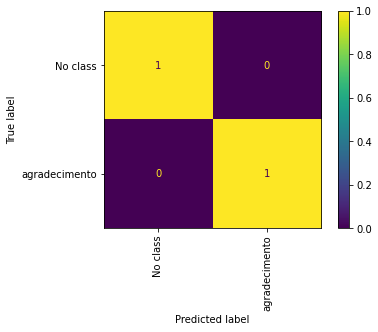




blusa  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.98        32
       blusa       1.00      0.50      0.67         2

    accuracy                           0.97        34
   macro avg       0.98      0.75      0.83        34
weighted avg       0.97      0.97      0.97        34



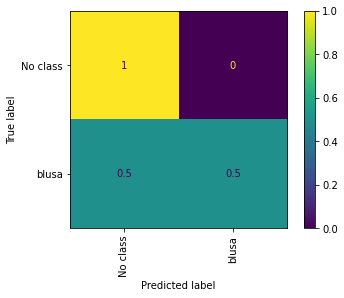




calça  - n:  1 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.99        33
       calça       0.00      0.00      0.00         1

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


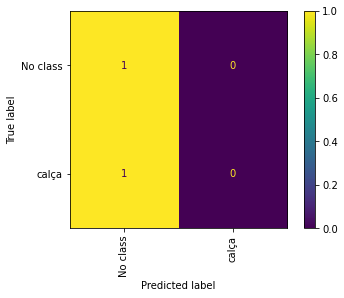




camisa  - n:  1 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.99        33
      camisa       0.00      0.00      0.00         1

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34



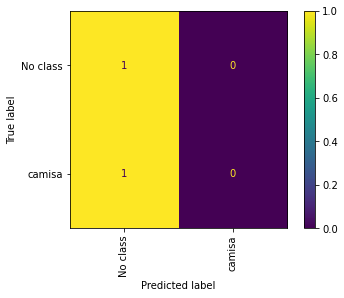




cintura  - n:  3 / 34
              precision    recall  f1-score   support

    No class       1.00      1.00      1.00        31
     cintura       1.00      1.00      1.00         3

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



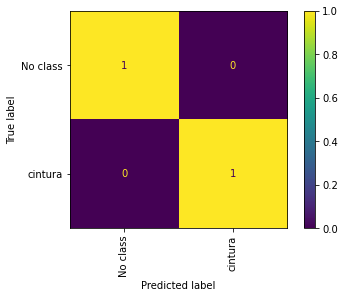




confirmação  - n:  7 / 34
              precision    recall  f1-score   support

    No class       0.81      0.96      0.88        27
 confirmação       0.50      0.14      0.22         7

    accuracy                           0.79        34
   macro avg       0.66      0.55      0.55        34
weighted avg       0.75      0.79      0.75        34



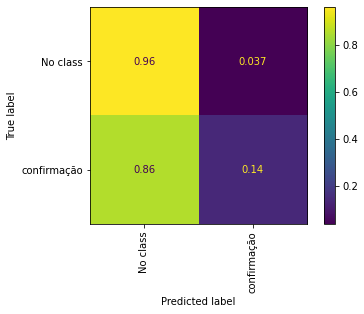




cor  - n:  9 / 34
              precision    recall  f1-score   support

    No class       0.96      1.00      0.98        25
         cor       1.00      0.89      0.94         9

    accuracy                           0.97        34
   macro avg       0.98      0.94      0.96        34
weighted avg       0.97      0.97      0.97        34



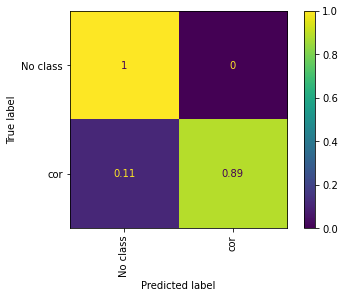




cumprimento  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.98        32
 cumprimento       1.00      0.50      0.67         2

    accuracy                           0.97        34
   macro avg       0.98      0.75      0.83        34
weighted avg       0.97      0.97      0.97        34



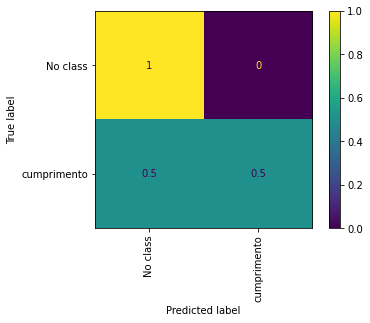




disponibilidade  - n:  7 / 34
                 precision    recall  f1-score   support

       No class       0.87      1.00      0.93        27
disponibilidade       1.00      0.43      0.60         7

       accuracy                           0.88        34
      macro avg       0.94      0.71      0.77        34
   weighted avg       0.90      0.88      0.86        34



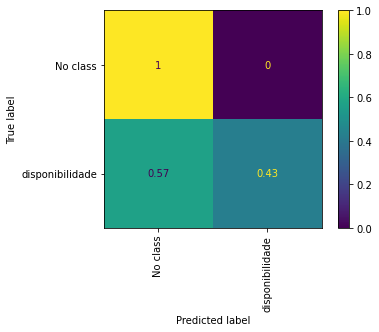




elogio  - n:  3 / 34
              precision    recall  f1-score   support

    No class       0.91      1.00      0.95        31
      elogio       0.00      0.00      0.00         3

    accuracy                           0.91        34
   macro avg       0.46      0.50      0.48        34
weighted avg       0.83      0.91      0.87        34



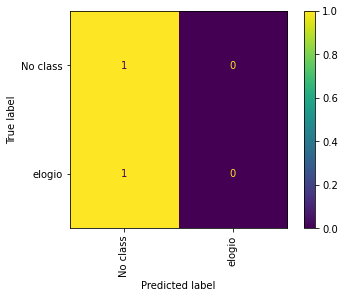




estampa  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.94      0.97      0.95        32
     estampa       0.00      0.00      0.00         2

    accuracy                           0.91        34
   macro avg       0.47      0.48      0.48        34
weighted avg       0.88      0.91      0.90        34



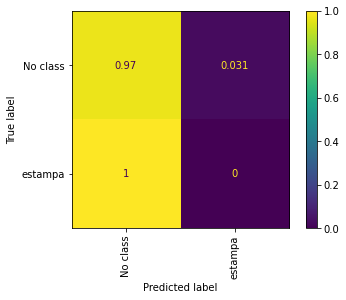




forma_entrega  - n:  0 / 34
              precision    recall  f1-score   support

    No class       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



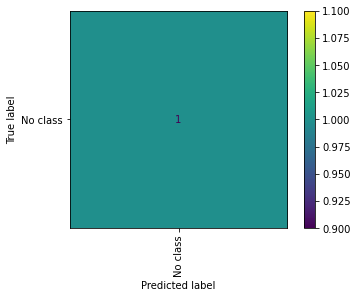




forma_pagamento  - n:  2 / 34
                 precision    recall  f1-score   support

       No class       0.97      1.00      0.98        32
forma_pagamento       1.00      0.50      0.67         2

       accuracy                           0.97        34
      macro avg       0.98      0.75      0.83        34
   weighted avg       0.97      0.97      0.97        34



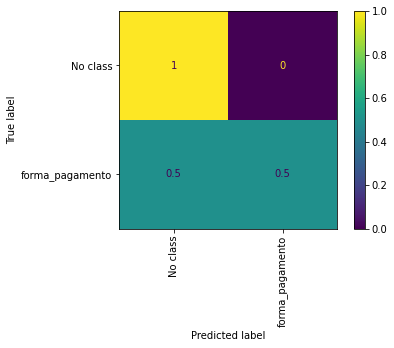




interesse_cliente  - n:  3 / 34
                   precision    recall  f1-score   support

         No class       0.97      0.94      0.95        31
interesse_cliente       0.50      0.67      0.57         3

         accuracy                           0.91        34
        macro avg       0.73      0.80      0.76        34
     weighted avg       0.93      0.91      0.92        34



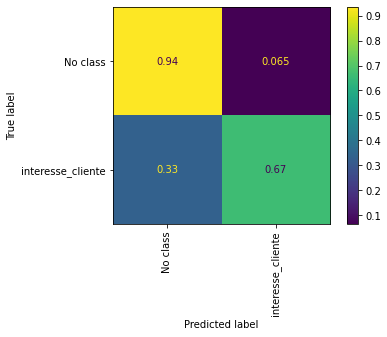




marca  - n:  1 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.99        33
       marca       0.00      0.00      0.00         1

    accuracy                           0.97        34
   macro avg       0.49      0.50      0.49        34
weighted avg       0.94      0.97      0.96        34



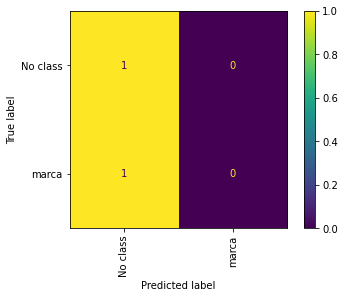




modelagem  - n:  4 / 34
              precision    recall  f1-score   support

    No class       0.94      1.00      0.97        30
   modelagem       1.00      0.50      0.67         4

    accuracy                           0.94        34
   macro avg       0.97      0.75      0.82        34
weighted avg       0.94      0.94      0.93        34



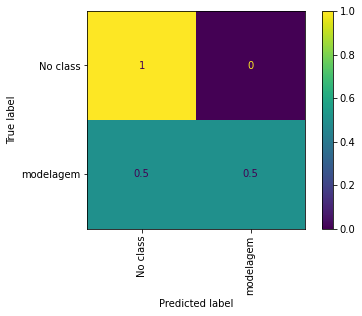




moletom  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.98        32
     moletom       1.00      0.50      0.67         2

    accuracy                           0.97        34
   macro avg       0.98      0.75      0.83        34
weighted avg       0.97      0.97      0.97        34



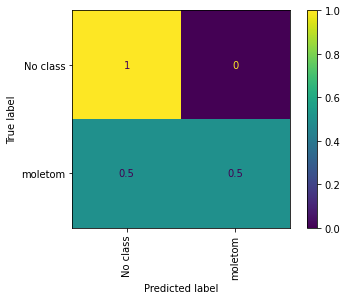




negação  - n:  4 / 34
              precision    recall  f1-score   support

    No class       0.91      0.97      0.94        30
     negação       0.50      0.25      0.33         4

    accuracy                           0.88        34
   macro avg       0.70      0.61      0.63        34
weighted avg       0.86      0.88      0.86        34



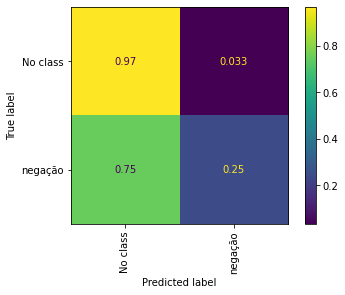




pergunta_entrega  - n:  0 / 34
              precision    recall  f1-score   support

    No class       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



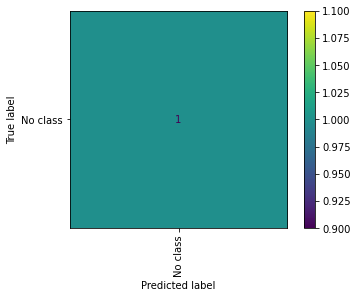




pergunta_forma_pagamento  - n:  2 / 34
                          precision    recall  f1-score   support

                No class       0.94      1.00      0.97        32
pergunta_forma_pagamento       0.00      0.00      0.00         2

                accuracy                           0.94        34
               macro avg       0.47      0.50      0.48        34
            weighted avg       0.89      0.94      0.91        34



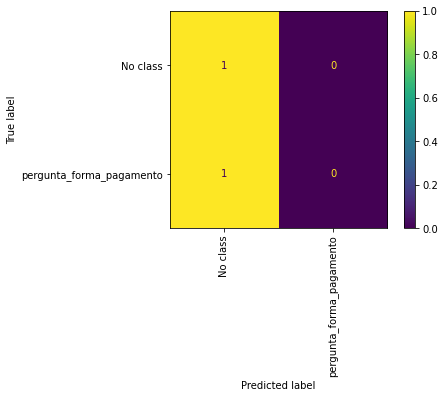




pergunta_pagamento  - n:  1 / 34
                    precision    recall  f1-score   support

          No class       0.97      1.00      0.99        33
pergunta_pagamento       0.00      0.00      0.00         1

          accuracy                           0.97        34
         macro avg       0.49      0.50      0.49        34
      weighted avg       0.94      0.97      0.96        34



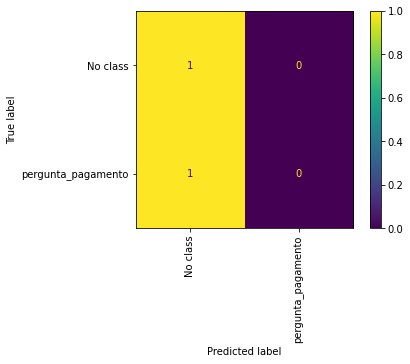




pergunta_preferencia  - n:  3 / 34
                      precision    recall  f1-score   support

            No class       0.94      1.00      0.97        31
pergunta_preferencia       1.00      0.33      0.50         3

            accuracy                           0.94        34
           macro avg       0.97      0.67      0.73        34
        weighted avg       0.94      0.94      0.93        34



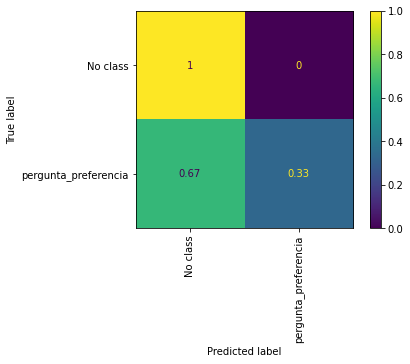




pergunta_produto  - n:  1 / 34
                  precision    recall  f1-score   support

        No class       0.97      0.94      0.95        33
pergunta_produto       0.00      0.00      0.00         1

        accuracy                           0.91        34
       macro avg       0.48      0.47      0.48        34
    weighted avg       0.94      0.91      0.93        34



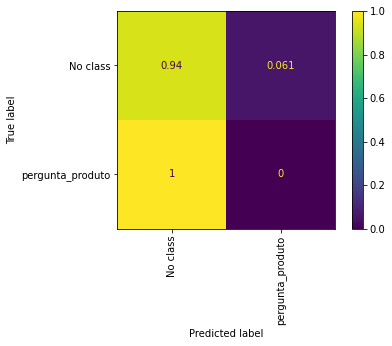




preço  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.94      1.00      0.97        32
       preço       0.00      0.00      0.00         2

    accuracy                           0.94        34
   macro avg       0.47      0.50      0.48        34
weighted avg       0.89      0.94      0.91        34



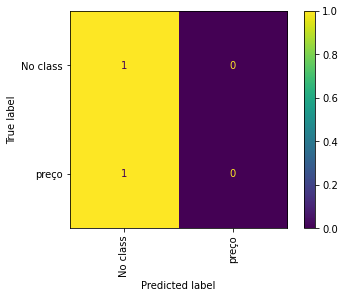




promoção  - n:  0 / 34
              precision    recall  f1-score   support

    No class       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



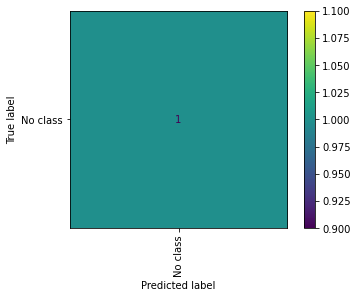




recomendação  - n:  0 / 34
              precision    recall  f1-score   support

    No class       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



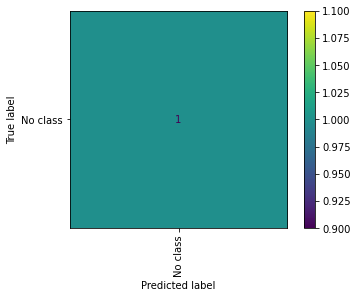




saia  - n:  7 / 34
              precision    recall  f1-score   support

    No class       0.87      1.00      0.93        27
        saia       1.00      0.43      0.60         7

    accuracy                           0.88        34
   macro avg       0.94      0.71      0.77        34
weighted avg       0.90      0.88      0.86        34



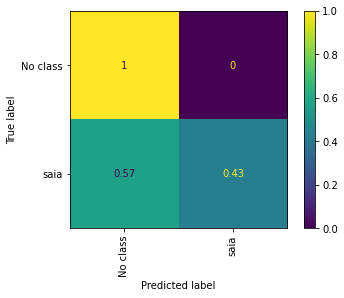




tamanho  - n:  4 / 34
              precision    recall  f1-score   support

    No class       0.97      1.00      0.98        30
     tamanho       1.00      0.75      0.86         4

    accuracy                           0.97        34
   macro avg       0.98      0.88      0.92        34
weighted avg       0.97      0.97      0.97        34



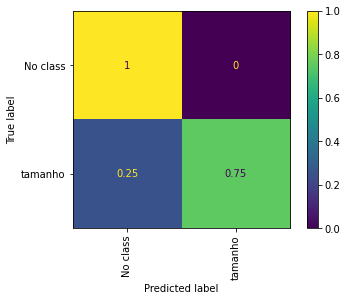




tecido  - n:  2 / 34
              precision    recall  f1-score   support

    No class       0.97      0.97      0.97        32
      tecido       0.50      0.50      0.50         2

    accuracy                           0.94        34
   macro avg       0.73      0.73      0.73        34
weighted avg       0.94      0.94      0.94        34



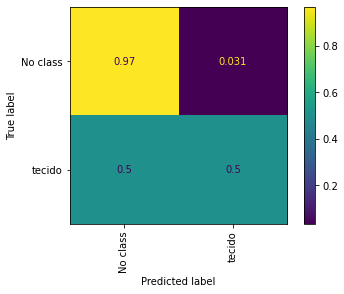

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Classification report por entidade
# usando X_test

# entity = {svc, X_test, Y_test}

for key, entity in models.items():
  
  y_pred = None
  y_pred = entity[0].predict(entity[1])
  try:
    n = models[key][2].value_counts()[key]
  except:
    n = 0

  total = models[key][2].value_counts().sum()
  print(key," - n: ", n, "/", total)
  print(classification_report(entity[2], y_pred, 
                              target_names=np.unique(entity[2])))
  plot_confusion_matrix(entity[0], entity[1], entity[2], 
                        xticks_rotation='vertical', normalize='true')
  pyplot.show()

  print('\n\n')

